# Test technique

This notebook contains the algorithms for predicting the `TARGET_FLAG` in the auto insurance dataset: pre-processing of variables, training, evaluation of methods, and prediction of the test dataset. The three methods used are logistic regression, Decision Tree Classifier and Random Forest Classifier.

### Import data

In [1]:
# import libraries 
import pandas as pd
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt

In [40]:
# Import data
test = pd.read_csv(r"C:\Users\samba\OneDrive\Documents\X4_WAPE\Descartes\test_auto.csv")
train = pd.read_csv(r"C:\Users\samba\OneDrive\Documents\X4_WAPE\Descartes\train_auto.csv")

First look at the data:

In [49]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000,1,z_SUV,no,19217,2,Yes,3,17.0,Highly Urban/ Urban


In [33]:
test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [34]:
train.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
INDEX          8161 non-null int64
TARGET_FLAG    8161 non-null int64
TARGET_AMT     8161 non-null float64
KIDSDRIV       8161 non-null int64
AGE            8155 non-null float64
HOMEKIDS       8161 non-null int64
YOJ            7707 non-null float64
INCOME         7716 non-null object
PARENT1        8161 non-null object
HOME_VAL       7697 non-null object
MSTATUS        8161 non-null object
SEX            8161 non-null object
EDUCATION      8161 non-null object
JOB            7635 non-null object
TRAVTIME       8161 non-null int64
CAR_USE        8161 non-null object
BLUEBOOK       8161 non-null object
TIF            8161 non-null int64
CAR_TYPE       8161 non-null object
RED_CAR        8161 non-null object
OLDCLAIM       8161 non-null object
CLM_FREQ       8161 non-null int64
REVOKED        8161 non-null object
MVR_PTS        8161 non-null int64
CAR_AGE        7651 non-null float

In [25]:
train.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

In [3]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6045 entries, 0 to 8160
Data columns (total 26 columns):
INDEX          6045 non-null int64
TARGET_FLAG    6045 non-null int64
TARGET_AMT     6045 non-null float64
KIDSDRIV       6045 non-null int64
AGE            6045 non-null float64
HOMEKIDS       6045 non-null int64
YOJ            6045 non-null float64
INCOME         6045 non-null object
PARENT1        6045 non-null object
HOME_VAL       6045 non-null object
MSTATUS        6045 non-null object
SEX            6045 non-null object
EDUCATION      6045 non-null object
JOB            6045 non-null object
TRAVTIME       6045 non-null int64
CAR_USE        6045 non-null object
BLUEBOOK       6045 non-null object
TIF            6045 non-null int64
CAR_TYPE       6045 non-null object
RED_CAR        6045 non-null object
OLDCLAIM       6045 non-null object
CLM_FREQ       6045 non-null int64
REVOKED        6045 non-null object
MVR_PTS        6045 non-null int64
CAR_AGE        6045 non-null float

### Study the varaibles

In [27]:
import seaborn as sns

In [20]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'HOMEKIDS', 'TRAVTIME', 'TIF',
        'CLM_FREQ', 'MVR_PTS'],
       dtype='object'),
 dtype('float64'): Index(['TARGET_AMT', 'AGE', 'YOJ', 'CAR_AGE'], dtype='object'),
 dtype('O'): Index(['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
        'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED',
        'URBANICITY'],
       dtype='object')}

#### Numerical variables

The variables `['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']` contain "$" and "," which need to be removed.

In [41]:
# convert ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM'] to integer 

def convert_to_int(col):
    col_converted = []
    for i in list(train[col]):
        if type(i) != float: # cannot be replace if it is NaN
            col_converted.append(int(i.replace(',', '').replace('$',''))) # remove , and $, then convert it to integer
        else : 
            col_converted.append(i)
    return col_converted

for i in ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']:
    train[i] = convert_to_int(i)

Correlation between variables:

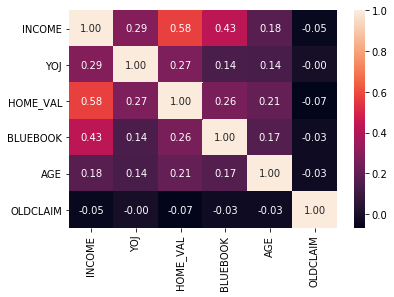

In [51]:
sns.heatmap(train[['INCOME','YOJ','HOME_VAL','BLUEBOOK', 'AGE', 'OLDCLAIM']].corr(), annot = True, fmt = ".2f")
plt.show()

- Fill some missing values

In [ ]:
from fancyimpute import IterativeImputer as MICE

In [ ]:
# use MICE to fill in missing values
data_selected = train[['INCOME', 'YOJ','HOME_VAL','BLUEBOOK', 'AGE']]
data_mice = pd.DataFrame(MICE().fit_transform(data_selected), columns=['INCOME', 'YOJ','HOME_VAL','BLUEBOOK', 'AGE'])

# replace old columns by filled columns
for i in ['INCOME', 'YOJ','HOME_VAL','BLUEBOOK', 'AGE']:
    train[i] = data_mice[i]

#### Categorical variables

In [32]:
var_category = ['TARGET_FLAG', 'PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 
                'URBANICITY', 'CLM_FREQ']

In [33]:
# function for plotting bar plots for categorical variables
def bar_plot(col):
        # get variable
        var = train[col]
        # count number of categorical variable(value/sample)
        varValue = var.value_counts()
        #visualize
        plt.figure(figsize = (9,3))
        plt.bar(varValue.index, varValue)
        plt.xticks(varValue.index, varValue.index.values)
        plt.ylabel("Frequency")
        plt.title(col)
        plt.show()
        print("{}: \n {}".format(col,varValue))

In [35]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000,1,z_SUV,no,19217,2,Yes,3,17.0,Highly Urban/ Urban


Visualise categorical variables:

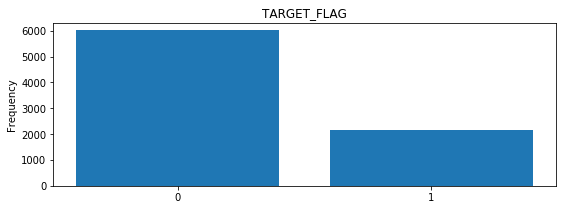

TARGET_FLAG: 
 0    6008
1    2153
Name: TARGET_FLAG, dtype: int64


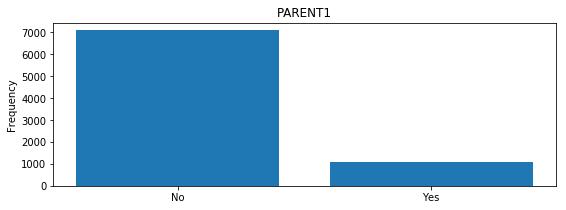

PARENT1: 
 No     7084
Yes    1077
Name: PARENT1, dtype: int64


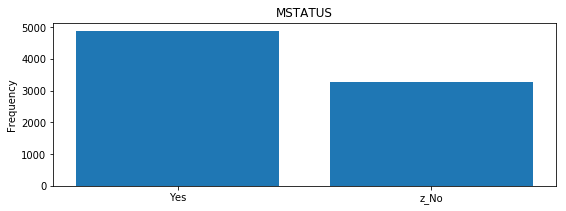

MSTATUS: 
 Yes     4894
z_No    3267
Name: MSTATUS, dtype: int64


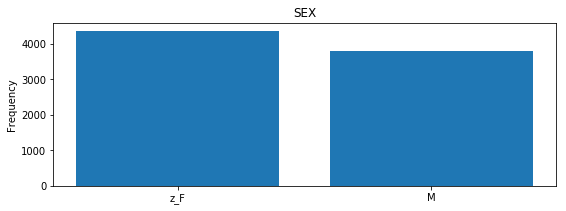

SEX: 
 z_F    4375
M      3786
Name: SEX, dtype: int64


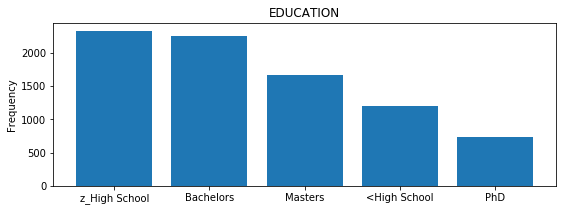

EDUCATION: 
 z_High School    2330
Bachelors        2242
Masters          1658
<High School     1203
PhD               728
Name: EDUCATION, dtype: int64


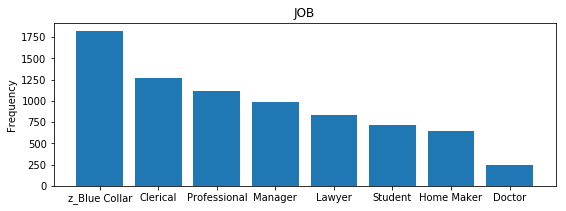

JOB: 
 z_Blue Collar    1825
Clerical         1271
Professional     1117
Manager           988
Lawyer            835
Student           712
Home Maker        641
Doctor            246
Name: JOB, dtype: int64


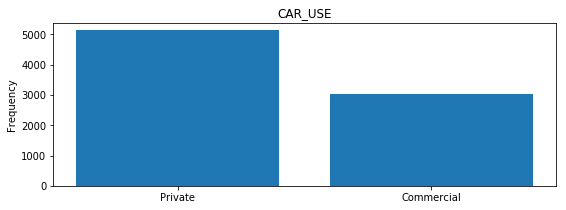

CAR_USE: 
 Private       5132
Commercial    3029
Name: CAR_USE, dtype: int64


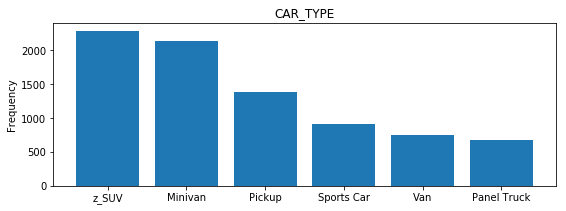

CAR_TYPE: 
 z_SUV          2294
Minivan        2145
Pickup         1389
Sports Car      907
Van             750
Panel Truck     676
Name: CAR_TYPE, dtype: int64


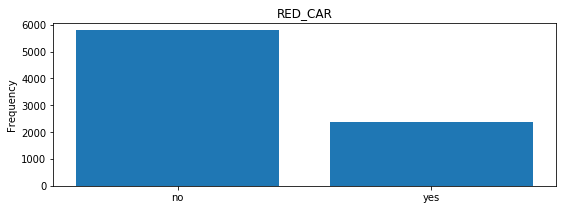

RED_CAR: 
 no     5783
yes    2378
Name: RED_CAR, dtype: int64


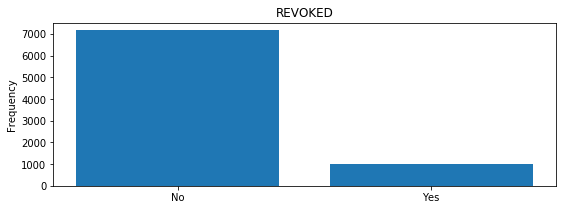

REVOKED: 
 No     7161
Yes    1000
Name: REVOKED, dtype: int64


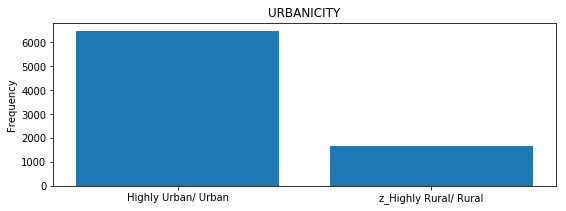

URBANICITY: 
 Highly Urban/ Urban      6492
z_Highly Rural/ Rural    1669
Name: URBANICITY, dtype: int64


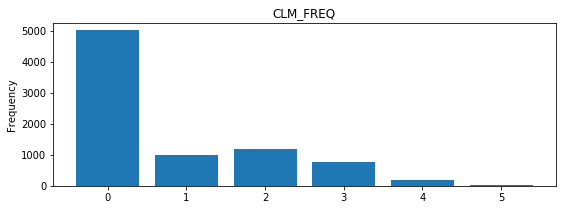

CLM_FREQ: 
 0    5009
2    1171
1     997
3     776
4     190
5      18
Name: CLM_FREQ, dtype: int64


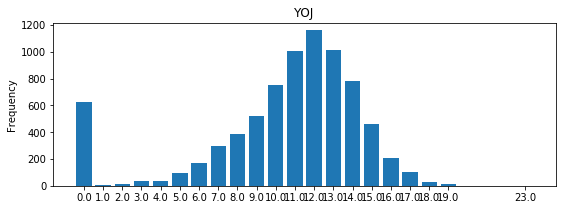

YOJ: 
 12.0    1158
13.0    1016
11.0    1003
14.0     785
10.0     749
0.0      625
9.0      521
15.0     463
8.0      384
7.0      300
16.0     204
6.0      173
17.0     101
5.0       92
4.0       37
3.0       36
18.0      25
2.0       15
19.0      12
1.0        6
23.0       2
Name: YOJ, dtype: int64


In [36]:
for c in var_category:
    bar_plot(c)

Next, we have to encode the categorical variables.

In [36]:
# create dummy variables for categorical 
# Variables that need dummy variables ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']

for col in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    train[col] = train[col].astype("category")
    train = pd.get_dummies(train, columns = [col])

In [37]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,SEX_M,SEX_z_F,EDUCATION_<High School,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,EDUCATION_z_High School,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,1,0,0.0,0,60.0,0,11.0,67349.0,0.0,14,14230,11,4461,2,3,18.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0
1,2,0,0.0,0,43.0,0,11.0,91449.0,257252.0,22,14940,1,0,0,0,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0
2,4,0,0.0,0,35.0,1,10.0,16039.0,124191.0,5,4010,4,38690,2,3,10.0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
3,5,0,0.0,0,51.0,0,14.0,NaN,306251.0,32,15440,7,0,0,0,6.0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0
4,6,0,0.0,0,50.0,0,NaN,114986.0,243925.0,36,18000,1,19217,2,3,17.0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0


#### Splitting train data for training and testing

In [7]:
# import library
from sklearn.model_selection import train_test_split

In [10]:
# random state for reproductivity
random_state = 123

In [8]:
# create dataset for training and testing
X = train.drop(labels = ["TARGET_FLAG", "INDEX", "TARGET_AMT"], axis = 1)
y = train["TARGET_FLAG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

### Models

In [9]:
# import packages for model training
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

#### Logistic regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)
print("Training Accuracy :% {}".format(acc_log_train))
print("Testing Accuracy :% {}".format(acc_log_test))

Training Accuracy :% 74.43
Testing Accuracy :% 71.63


C:\Users\samba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision Tree

In [13]:
tree_model = DecisionTreeClassifier(random_state = random_state)
# parameters choice
tree_param_grid = {"min_samples_split" : range(10,500,20), "max_depth": range(1,20,2)}
# initialise grid search
tree_grid = GridSearchCV(tree_model, param_grid=tree_param_grid, cv = StratifiedKFold(n_splits = 10), 
                         scoring = "accuracy", n_jobs = -1,verbose = 1)
# fit the model to the grid search
tree_grid.fit(X_train,y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1533 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 2485 out of 2500 | elapsed:   34.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   34.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [14]:
tree_grid.best_score_

0.757335098168983

#### Random Forest

In [15]:
rf_model = RandomForestClassifier(random_state = random_state)

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "n_estimators":[100,300],
                "criterion":["gini"]}

rf_grid = GridSearchCV(rf_model, param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), 
                         scoring = "accuracy", n_jobs = -1,verbose = 1)

rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [False], 'n_estimators': [100, 300], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [17]:
rf_grid.best_score_

0.7941760423560555

#### Evaluation

### Prediction

In [ ]:
# prepare the test data: create dummy variables and remove $ and , signs

# encoding categorical variables
for col in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    test[col] = test[col].astype("category")
    test = pd.get_dummies(test, columns = [col])

# convert ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM'] to integers
for i in ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']:
    test[i] = convert_to_int(i)

# get X for prediction
X = test.drop(labels = ["TARGET_FLAG", "INDEX", "TARGET_AMT"], axis = 1)

# make prediction using the best method
